In [158]:
import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [182]:
log_v = "log_recon_raw_2025_07_13"
run_idx = 2
log_root = Path(f"/home/juhyung/data/longitudinal/log/{log_v}/{run_idx:05d}_test/test/")
res_files = glob.glob(str(log_root) + "/*.mat")
print(len(res_files))

12


In [183]:
idx = 10

res_mat = loadmat(res_files[idx])
prior = res_mat["prior"].squeeze()
out = res_mat["out"].squeeze()
target = res_mat["target"].squeeze()
target_undersample = res_mat["target_undersample"].squeeze()
mask = res_mat["mask"].squeeze()
sudo_recon = res_mat["sudo_recon"].squeeze() if "sudo_recon" in res_mat else None
prior_reg = res_mat["prior_reg"].squeeze() if "prior_reg" in res_mat else None

print(f"prior shape: {prior.shape}")
print(f"out shape: {out.shape}")
print(f"target shape: {target.shape}")
print(f"target_undersample shape: {target_undersample.shape if target_undersample is not None else 'N/A'}")
print(f"mask shape: {mask.shape}")
print(f"sudo_recon shape: {sudo_recon.shape if sudo_recon is not None else 'N/A'}")
print(f"prior_reg shape: {prior_reg.shape if prior_reg is not None else 'N/A'}")

prior shape: (16, 512, 512)
out shape: (16, 512, 512, 2)
target shape: (16, 512, 512, 2)
target_undersample shape: (16, 512, 512, 2)
mask shape: (512, 512)
sudo_recon shape: (16, 512, 512)
prior_reg shape: (16, 512, 512)


In [184]:
slice = 0

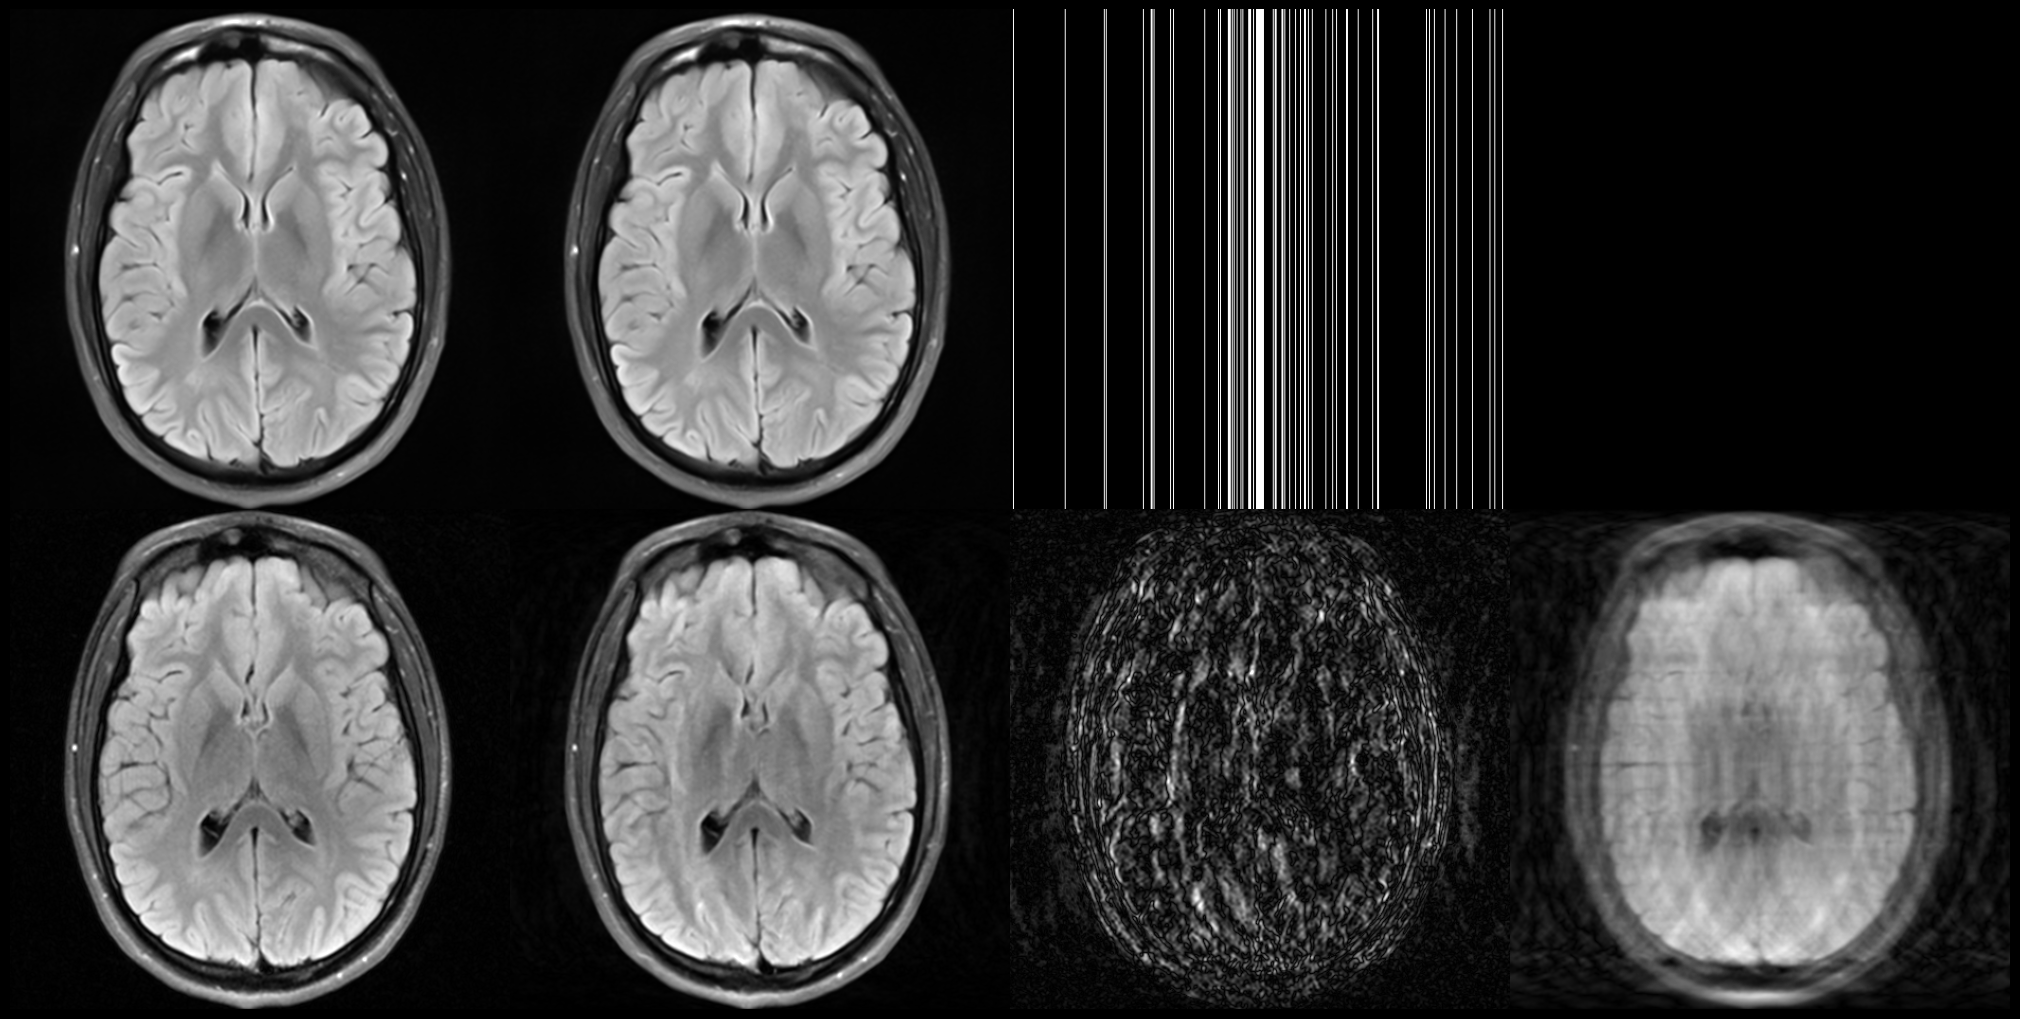

In [185]:
x1, x2, y1, y2 = 20, -20, 20, -20
out_abs = np.abs(out[:, :, :, 0] + 1j * out[:, :, :, 1])
target_abs = np.abs(target[:, :, :, 0] + 1j * target[:, :, :, 1])
target_undersample_abs = np.abs(target_undersample[:, :, :, 0] + 1j * target_undersample[:, :, :, 1])
prior_slice = prior[slice, x1:x2, y1:y2]
out_slice = out_abs[slice, x1:x2, y1:y2]
target_slice = target_abs[slice, x1:x2, y1:y2]
target_undersample_slice = target_undersample_abs[slice, x1:x2, y1:y2]
mask_slice = mask
prior_reg_slice = prior_reg[slice, x1:x2, y1:y2] if prior_reg is not None else np.zeros_like(prior_slice)
sudo_recon_slice = sudo_recon[slice, x1:x2, y1:y2] if sudo_recon is not None else np.zeros_like(prior_slice)


vmax = np.percentile(target_abs, 99) * 1.3
pvmax = np.percentile(prior, 99) * 1.3
vmin = np.percentile(target_abs, 99) * 0.0
vmin = None
pvmin = np.percentile(prior, 99) * 0.0
pvmin = None
fig = plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)
fig.patch.set_facecolor("black")
plt.subplot(2, 4, 1)
plt.imshow(prior_slice, cmap="gray", vmax=pvmax, vmin=pvmin)
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(prior_reg_slice, cmap="gray", vmax=pvmax, vmin=pvmin)
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(mask_slice, cmap="gray", vmax=1, vmin=0)
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(target_slice, cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(out_slice, cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(5 * abs(out_slice - target_slice), cmap="gray", vmax=vmax, vmin=0)
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(target_undersample_slice, cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()

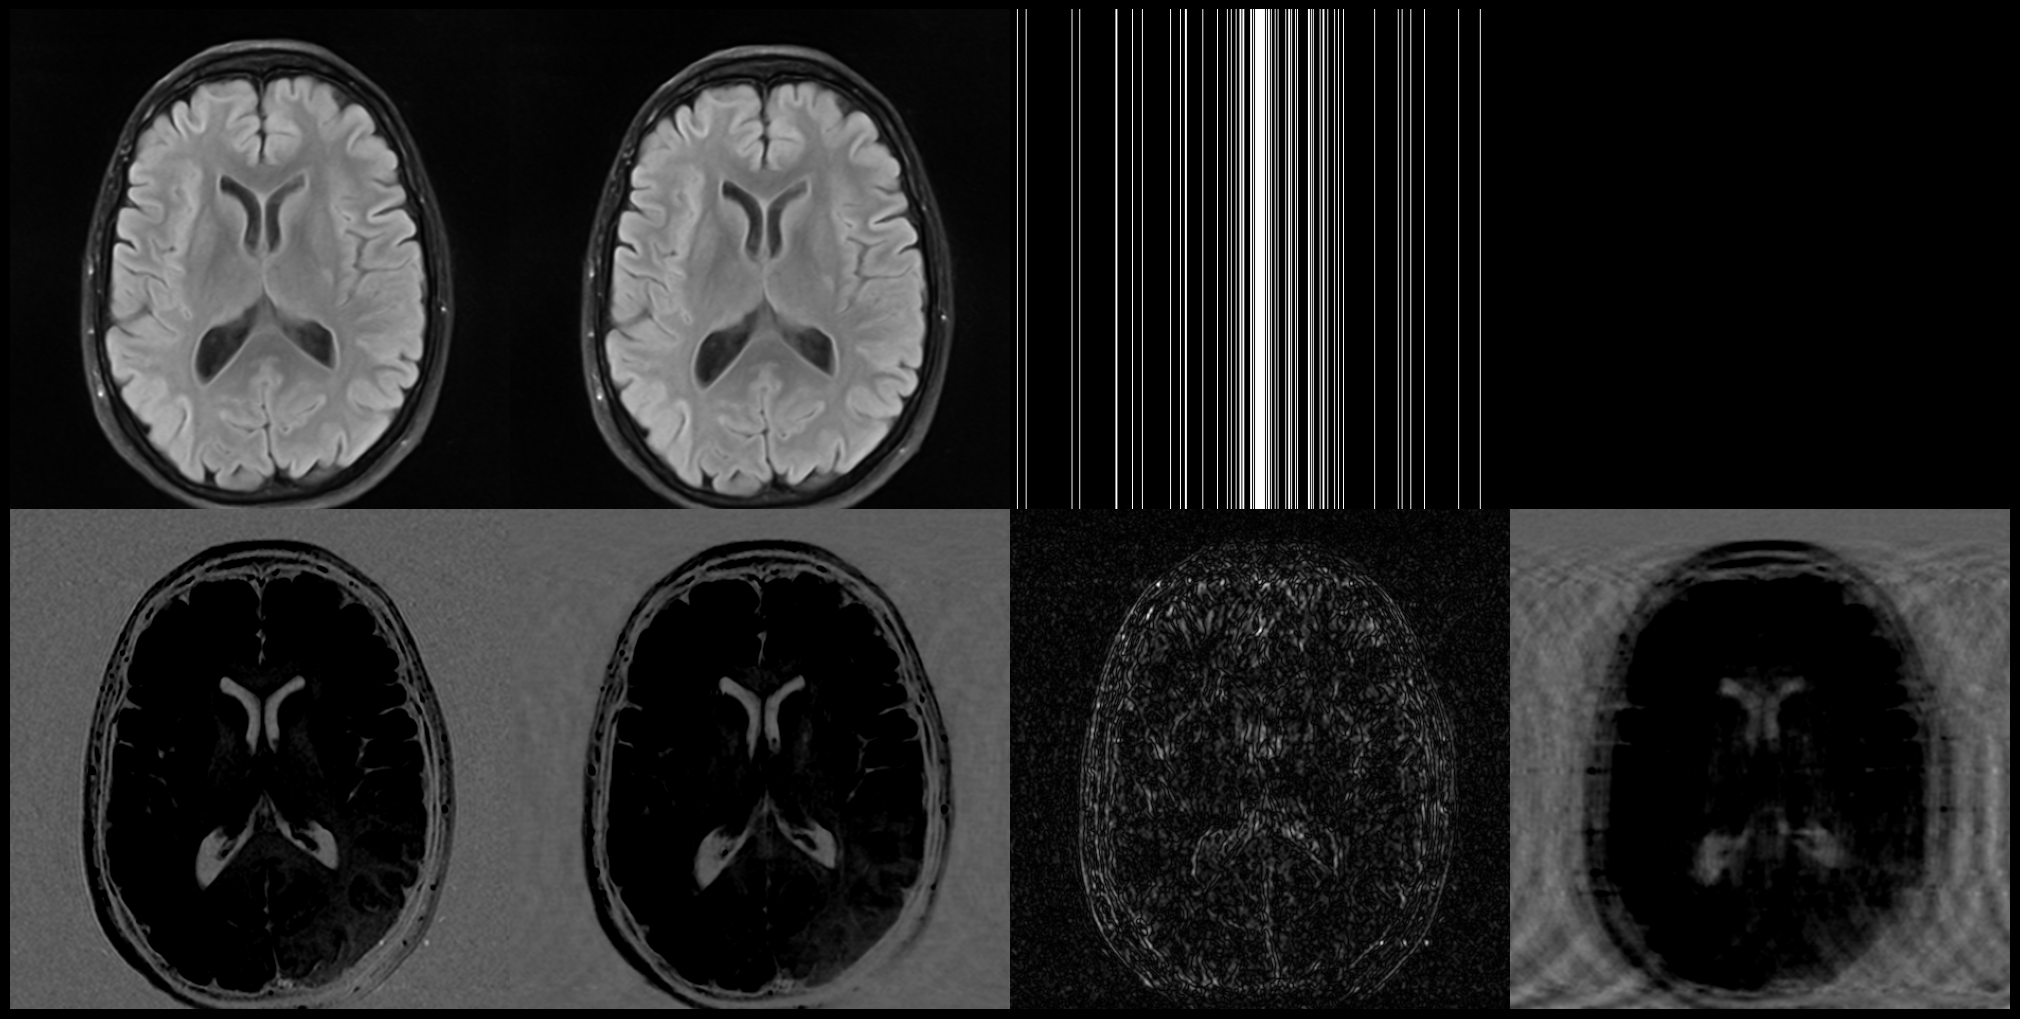

In [ ]:
x1, x2, y1, y2 = 20, -20, 20, -20
# out_abs = np.angle(out[:, :, :, 0] + 1j * out[:, :, :, 1])
# target_abs = np.angle(target[:, :, :, 0] + 1j * target[:, :, :, 1])
# target_undersample_abs = np.angle(target_undersample[:, :, :, 0] + 1j * target_undersample[:, :, :, 1])
ii = 1
out_abs = out[:, :, :, ii]
target_abs = target[:, :, :, ii]
target_undersample_abs = target_undersample[:, :, :, ii]
prior_slice = prior[slice, x1:x2, y1:y2]
out_slice = out_abs[slice, x1:x2, y1:y2]
target_slice = target_abs[slice, x1:x2, y1:y2]
target_undersample_slice = target_undersample_abs[slice, x1:x2, y1:y2]
mask_slice = mask
prior_reg_slice = prior_reg[slice, x1:x2, y1:y2] if prior_reg is not None else np.zeros_like(prior_slice)
sudo_recon_slice = sudo_recon[slice, x1:x2, y1:y2] if sudo_recon is not None else np.zeros_like(prior_slice)


vmax = np.percentile(target_abs, 99)
pvmax = None
vmin = np.percentile(target_abs, 10)
pvmin = None
fig = plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)
fig.patch.set_facecolor("black")
plt.subplot(2, 4, 1)
plt.imshow(prior_slice, cmap="gray", vmax=pvmax, vmin=pvmin)
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(prior_reg_slice, cmap="gray", vmax=pvmax, vmin=pvmin)
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(mask_slice, cmap="gray", vmax=1, vmin=0)
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(target_slice, cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(out_slice, cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(5 * abs(out_slice - target_slice), cmap="gray")
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(target_undersample_slice, cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()

In [62]:
target_slice.std()

np.float32(1.6266134)